# WeatherPy
----

## My Observations:
* It was fascinating to discover that some factors, such as humidity and max temperatures, tend to have similar outcomes in certain regions in both the Northern and Southern Hemispheres. Keep in mind, we are observing all of this during the summer season. For instance, the max temperatures (see Fig1) are continously the highest at and near the Equator. In Fig2, we see the humidity is usually 50% or higher at and around the Equator where in other regions up in the North and South all vary anywhere between 3-100%. 
* The cloudiness was interesting to me because before performing this analysis I figured it would be mostly cloudy in the regions where extreme weather occurs such as the Equator and both North and South poles. However, as I performed this analysis I discovered that cloudiness it pretty much all over the place in both Hemispheres no matter what the other weather conditions are like. While some cities in their respective regions have more clusters of  clear skies or very cloudy days the plot (see Fig3) shows us that it is dispersed fairly well over the entire globe.
* When it came to analyzing the wind speeds I did not imagine the wind speeds would be so low for some areas. I expected to fins high winds in at least a few areas around the world. However, the highest speeds I could find during this analysis were at most 25-35mph. I was surprised to make this discovery. The majority of the world was experiencing anywhere between 1-10mph winds (refer to Fig4).

In [1]:
# Dependencies and Setup:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pprint import pprint
import requests
import time
from scipy.stats import linregress

# Import API key:
from api_keys import weather_api_key

# Using citipy to determine city based on latitude and longitude:
from citipy import citipy

# Range of latitudes and longitudes:
lat_range = (-90, 90)
lng_range = (-180, 180)

# Using 'Timestamp' to print the current date for whenever code runs:
current_date = pd.Timestamp("today").strftime("%m/%d/%Y")

In [2]:
# List for holding lat_lngs and cities:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations:
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list:
    if city not in cities:
        cities.append(city)

# Print to confirm sufficient count of cities:
len(cities)

622

In [3]:
cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0: "City"})
cities_pd["Latitude"] = ""
cities_pd["Longitude"] = ""
cities_pd["Max Temperature"] = ""
cities_pd["Humidity"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Wind Speed"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,ozinki,,,,,,,,
1,carballo,,,,,,,,
2,abu samrah,,,,,,,,
3,mataura,,,,,,,,
4,hastings,,,,,,,,


In [4]:
# Performing the API calls and printing the log all at once:

units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

print("----------------------------------------")
print("Beginning Data Retrieval:")
print("----------------------------------------")

# Creating lists to store the city/location, temp, etc:
location = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

city_num = 1
city_set = 1

# Created 'for loop' to search through the list of cities for city as we call the API:
for city in cities:
    q_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"
    temp_response = requests.get(q_url).json()
    
    print(f"Processing records: {city_num} of Set {city_set} | {city}")

    try:
        city_num += 1
        location.append(temp_response['name'])        
        lat.append(temp_response['coord']['lat'])
        long.append(temp_response['coord']['lon'])
        max_temp.append(temp_response['main']['temp'])
        humidity.append(temp_response['main']['humidity'])
        cloudiness.append(temp_response['clouds']['all'])
        wind_speed.append(temp_response['wind']['speed'])
        country.append(temp_response['sys']['country'])
        date.append(temp_response['dt'])
        
    except (KeyError, IndexError):
        print("City not found. Resuming...")
        pass
    
    if city_num == 51:
        city_set += 1
        city_num = 1
        
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")

----------------------------------------
Beginning Data Retrieval:
----------------------------------------
Processing records: 1 of Set 1 | ozinki
Processing records: 2 of Set 1 | carballo
Processing records: 3 of Set 1 | abu samrah
Processing records: 4 of Set 1 | mataura
Processing records: 5 of Set 1 | hastings
Processing records: 6 of Set 1 | saint-philippe
Processing records: 7 of Set 1 | esperance
Processing records: 8 of Set 1 | ushuaia
Processing records: 9 of Set 1 | san patricio
Processing records: 10 of Set 1 | leningradskiy
Processing records: 11 of Set 1 | roald
Processing records: 12 of Set 1 | hilo
Processing records: 13 of Set 1 | bluff
Processing records: 14 of Set 1 | arlit
Processing records: 15 of Set 1 | turukhansk
Processing records: 16 of Set 1 | castro
Processing records: 17 of Set 1 | coquimbo
Processing records: 18 of Set 1 | avarua
Processing records: 19 of Set 1 | lagoa
Processing records: 20 of Set 1 | chebenki
Processing records: 21 of Set 1 | bredasdorp


Processing records: 30 of Set 4 | cidreira
Processing records: 31 of Set 4 | flinders
Processing records: 32 of Set 4 | humaita
Processing records: 33 of Set 4 | cherskiy
Processing records: 34 of Set 4 | piacabucu
Processing records: 35 of Set 4 | alice town
Processing records: 36 of Set 4 | annonay
Processing records: 37 of Set 4 | umm jarr
City not found. Resuming...
Processing records: 38 of Set 4 | saleaula
City not found. Resuming...
Processing records: 39 of Set 4 | gulshat
City not found. Resuming...
Processing records: 40 of Set 4 | yulara
Processing records: 41 of Set 4 | lavrentiya
Processing records: 42 of Set 4 | chicama
Processing records: 43 of Set 4 | inhambane
Processing records: 44 of Set 4 | jinchang
Processing records: 45 of Set 4 | contadero
Processing records: 46 of Set 4 | lolua
City not found. Resuming...
Processing records: 47 of Set 4 | buala
Processing records: 48 of Set 4 | mitsamiouli
Processing records: 49 of Set 4 | sorland
Processing records: 50 of Set 4

Processing records: 11 of Set 8 | batagay-alyta
Processing records: 12 of Set 8 | boali
Processing records: 13 of Set 8 | hami
Processing records: 14 of Set 8 | kalmunai
Processing records: 15 of Set 8 | cap estate
Processing records: 16 of Set 8 | attawapiskat
City not found. Resuming...
Processing records: 17 of Set 8 | alotau
City not found. Resuming...
Processing records: 18 of Set 8 | sur
Processing records: 19 of Set 8 | moshny
Processing records: 20 of Set 8 | gambo
Processing records: 21 of Set 8 | sao joao da barra
Processing records: 22 of Set 8 | paamiut
Processing records: 23 of Set 8 | asfi
Processing records: 24 of Set 8 | asekeyevo
Processing records: 25 of Set 8 | houma
Processing records: 26 of Set 8 | rabo de peixe
Processing records: 27 of Set 8 | berdigestyakh
Processing records: 28 of Set 8 | wamba
Processing records: 29 of Set 8 | milkovo
Processing records: 30 of Set 8 | portland
Processing records: 31 of Set 8 | alexander city
Processing records: 32 of Set 8 | p

Processing records: 37 of Set 11 | khazar
Processing records: 38 of Set 11 | caravelas
Processing records: 39 of Set 11 | rungata
City not found. Resuming...
Processing records: 40 of Set 11 | najran
Processing records: 41 of Set 11 | touros
Processing records: 42 of Set 11 | hounde
Processing records: 43 of Set 11 | prince rupert
Processing records: 44 of Set 11 | mackay
Processing records: 45 of Set 11 | burnie
Processing records: 46 of Set 11 | wahran
City not found. Resuming...
Processing records: 47 of Set 11 | sarangarh
Processing records: 48 of Set 11 | vardo
Processing records: 49 of Set 11 | luancheng
Processing records: 50 of Set 11 | tura
Processing records: 1 of Set 12 | higuey
City not found. Resuming...
Processing records: 2 of Set 12 | bandar
Processing records: 3 of Set 12 | igarka
Processing records: 4 of Set 12 | pueblo nuevo
Processing records: 5 of Set 12 | mareeba
Processing records: 6 of Set 12 | ixtapa
Processing records: 7 of Set 12 | vila franca do campo
Proces

In [5]:
# Verifing the amount of cities processed remains the same as when we pulled the info:
cities_pd.count()

City               622
Latitude           622
Longitude          622
Max Temperature    622
Humidity           622
Cloudiness         622
Wind Speed         622
Country            622
Date               622
dtype: int64

In [6]:
# Displaying the DataFrame:
cities_pd = pd.DataFrame({
    "City": location,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

cities_pd.head(10)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ozinki,51.18,49.68,70.79,76,54,8.66,RU,1594581213
1,Carballo,43.21,-8.69,71.47,50,0,10.29,ES,1594581144
2,Abu Samrah,35.30,37.18,74.91,69,0,14.61,SY,1594581213
3,Mataura,-46.19,168.86,39.00,83,88,3.00,NZ,1594580856
4,Hastings,50.86,0.57,63.45,51,98,5.39,GB,1594580894
5,Saint-Philippe,-21.36,55.77,64.18,68,10,5.82,RE,1594580883
6,Esperance,-33.87,121.90,48.20,66,0,18.34,AU,1594580581
7,Ushuaia,-54.80,-68.30,35.60,80,40,24.16,AR,1594580773
8,San Patricio,19.22,-104.70,89.60,75,40,11.41,MX,1594580887
9,Leningradskiy,69.38,178.42,41.50,74,0,8.84,RU,1594580929


In [7]:
# Converting the city data into a 'csv' file:
cities_output = cities_pd.to_csv('../OutputData/cities.csv', index=False)

In [8]:
# The amount of rows printed will verify that only the cities that were found via API call and will be stored in the dataframe:
cities_pd

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ozinki,51.18,49.68,70.79,76,54,8.66,RU,1594581213
1,Carballo,43.21,-8.69,71.47,50,0,10.29,ES,1594581144
2,Abu Samrah,35.30,37.18,74.91,69,0,14.61,SY,1594581213
3,Mataura,-46.19,168.86,39.00,83,88,3.00,NZ,1594580856
4,Hastings,50.86,0.57,63.45,51,98,5.39,GB,1594580894
...,...,...,...,...,...,...,...,...,...
556,Qinhuangdao,39.93,119.59,71.10,73,100,2.68,CN,1594581356
557,Solnechnyy,50.72,136.63,59.07,86,52,2.15,RU,1594581356
558,Sumenep,-7.02,113.87,78.57,82,100,6.31,ID,1594580909
559,Kushiro,42.98,144.37,53.46,92,28,4.43,JP,1594581357


In [9]:
# Find the cities with humidity that is over 100%:
humidity_over100 = cities_pd.sort_values('Humidity', ascending=False)
humidity_over100

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
460,Canberra,-35.28,149.13,41.14,100,90,4.70,AU,1594581303
188,Soe,-9.86,124.28,64.02,100,100,6.04,ID,1594580974
68,Airai,-8.93,125.41,56.14,100,64,4.21,TL,1594580965
428,Lashio,22.93,97.75,68.97,100,100,1.25,MM,1594581321
237,Petropavlovsk-Kamchatskiy,53.05,158.65,53.60,100,75,4.47,RU,1594580670
...,...,...,...,...,...,...,...,...,...
102,Gazojak,41.19,61.40,89.19,14,0,12.64,TM,1594581237
13,Arlit,18.74,7.39,100.53,13,0,5.66,NE,1594581215
130,Alamosa,37.47,-105.87,86.00,12,1,5.82,US,1594581244
282,Cody,44.53,-109.06,90.82,9,1,9.17,US,1594581281


In [10]:
# No humidity over 100% was found; therefore, moving onto the next analysis.

## Latitude vs. Temperature Plot

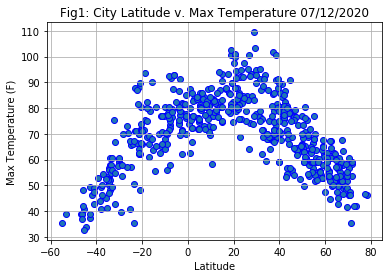

In [11]:
# Plotting 'Latitude v. Max Temperature':
x = cities_pd['Latitude']
y = cities_pd['Max Temperature']
plt.scatter(x, y, edgecolor='b')
plt.title(f"Fig1: City Latitude v. Max Temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('../OutputData/Fig1.png')
plt.show()

* This plot, 'City Latitude v. Max Temperature', illustrates that the temperatures are higher in the cities closer to the Equator. Therefore, the temperatures lower in the cities closer to the North and South poles.

## Latitude vs. Humidity Plot

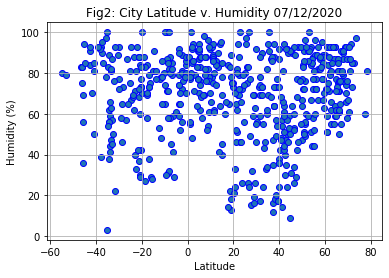

In [12]:
# Plotting Latitude v. Humidity:
x = cities_pd['Latitude']
y = cities_pd['Humidity']
plt.scatter(x, y, edgecolor='b')
plt.title(f"Fig2: City Latitude v. Humidity {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('../OutputData/Fig2.png')
plt.show()

* This plot, 'City Latitude v. Humidity', illustrates that the humidity in some cities can range anywhere from about 3-100%. Meanwhile, at the Equator (and regions close by) are usually high in humidity ranging anywhere from 50-100% as of today.

## Latitude vs. Cloudiness Plot

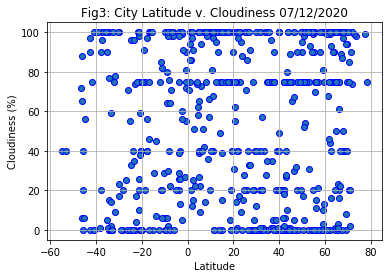

In [13]:
# Plotting latitude v. cloudiness:
x = cities_pd['Latitude']
y = cities_pd['Cloudiness']
plt.scatter(x, y, edgecolor='b')
plt.title(f"Fig3: City Latitude v. Cloudiness {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('../OutputData/Fig3.png')
plt.show()

* This plot, 'City Latitude v. Cloudiness', illustrates that cloudiness is all over the place no matter where in the world you may be today.

## Latitude vs. Wind Speed Plot

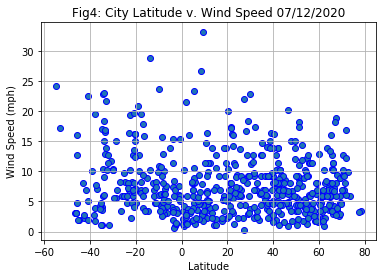

In [14]:
# Plotting latitude v. wind_speed:
x = cities_pd['Latitude']
y = cities_pd['Wind Speed']
plt.scatter(x, y, edgecolor='b')
plt.title(f"Fig4: City Latitude v. Wind Speed {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('../OutputData/Fig4.png')
plt.show()

* This plot, 'City Latitude v. Wind Speed', illustrates the wind speeds all over the world as of today.

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames

# Northern Hemisphere (on Latitude from 0 to 90 degrees):
northern_hemi = cities_pd.loc[(cities_pd['Latitude'] >= 0)]
northern_hemi

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ozinki,51.18,49.68,70.79,76,54,8.66,RU,1594581213
1,Carballo,43.21,-8.69,71.47,50,0,10.29,ES,1594581144
2,Abu Samrah,35.30,37.18,74.91,69,0,14.61,SY,1594581213
4,Hastings,50.86,0.57,63.45,51,98,5.39,GB,1594580894
8,San Patricio,19.22,-104.70,89.60,75,40,11.41,MX,1594580887
...,...,...,...,...,...,...,...,...,...
554,Anadyr,64.75,177.48,53.26,71,100,13.42,RU,1594580950
555,Plastun,44.76,136.29,56.89,91,89,1.54,RU,1594581356
556,Qinhuangdao,39.93,119.59,71.10,73,100,2.68,CN,1594581356
557,Solnechnyy,50.72,136.63,59.07,86,52,2.15,RU,1594581356


In [16]:
# This will show me the cities farthest and closest in the Northern Hemisphere:
north_high_to_low = northern_hemi.sort_values('Latitude', ascending=False)
north_high_to_low

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
80,Longyearbyen,78.22,15.64,46.40,81,75,3.36,SJ,1594580861
195,Qaanaaq,77.48,-69.36,46.54,60,99,3.20,GL,1594580902
22,Dikson,73.51,80.55,41.97,97,98,5.86,RU,1594580858
70,Upernavik,72.79,-56.15,42.19,85,99,9.93,GL,1594580847
160,Khatanga,71.97,102.50,53.74,85,100,12.24,RU,1594580967
...,...,...,...,...,...,...,...,...,...
395,Amapá,1.00,-52.00,87.22,56,94,4.16,BR,1594580597
175,Contadero,0.91,-77.55,62.60,55,75,10.29,CO,1594581255
238,Yangambi,0.81,24.43,75.45,77,86,1.32,CD,1594581270
276,Ternate,0.80,127.40,80.20,78,100,3.33,ID,1594581279


In [17]:
# Southern Hemisphere (on Latitude less than 0 degrees):
southern_hemi = cities_pd.loc[(cities_pd['Latitude'] < 0)]
southern_hemi

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
3,Mataura,-46.19,168.86,39.00,83,88,3.00,NZ,1594580856
5,Saint-Philippe,-21.36,55.77,64.18,68,10,5.82,RE,1594580883
6,Esperance,-33.87,121.90,48.20,66,0,18.34,AU,1594580581
7,Ushuaia,-54.80,-68.30,35.60,80,40,24.16,AR,1594580773
12,Bluff,-46.60,168.33,39.00,83,72,3.00,NZ,1594581215
...,...,...,...,...,...,...,...,...,...
542,Merauke,-8.47,140.33,77.31,85,100,15.68,ID,1594580971
547,Colinas,-6.03,-44.25,92.77,29,0,5.14,BR,1594581354
548,Ballarat,-37.57,143.85,46.47,95,96,7.76,AU,1594581186
558,Sumenep,-7.02,113.87,78.57,82,100,6.31,ID,1594580909


In [18]:
# This will show me the cities closest and farthest in the Southern Hemisphere:
south_low_to_high = southern_hemi.sort_values('Latitude', ascending=True)
south_low_to_high

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
7,Ushuaia,-54.80,-68.30,35.60,80,40,24.16,AR,1594580773
49,Punta Arenas,-53.15,-70.92,39.09,79,40,17.22,CL,1594580775
12,Bluff,-46.60,168.33,39.00,83,72,3.00,NZ,1594581215
360,Kaitangata,-46.28,169.85,37.00,75,6,3.00,NZ,1594580847
3,Mataura,-46.19,168.86,39.00,83,88,3.00,NZ,1594580856
...,...,...,...,...,...,...,...,...,...
251,Padang,-0.95,100.35,77.65,80,75,5.32,ID,1594581089
37,Biak,-0.91,122.88,75.97,84,81,5.99,ID,1594580916
73,Puerto Ayora,-0.74,-90.35,70.00,86,72,5.01,EC,1594580862
345,Port-Gentil,-0.72,8.78,77.00,88,90,15.39,GA,1594581160


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5262783919887263


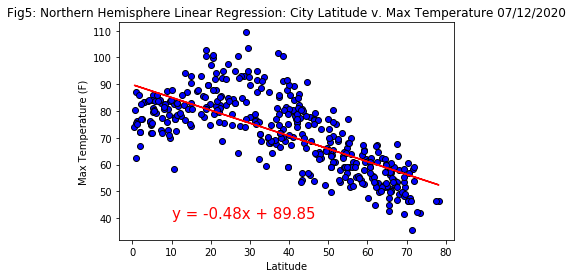

In [19]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Max Temperature':
x = northern_hemi['Latitude']
y = northern_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(10,40), fontsize=15, color="r")
plt.title(f"Fig5: Northern Hemisphere Linear Regression: City Latitude v. Max Temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig5.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6384927808555292


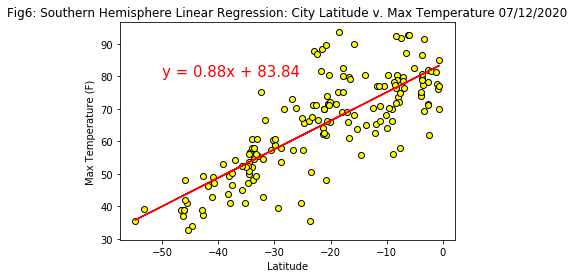

In [20]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Max Temperature':
x = southern_hemi['Latitude']
y = southern_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,80), fontsize=15, color="r")
plt.title(f"Fig6: Southern Hemisphere Linear Regression: City Latitude v. Max Temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig6.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * The Northern Hemisphere has a downward trend that temperatures decrease steadily as you travel farther up North.
    * In the Southern Hemisphere, there is an upward trend that shows temperatures rise steadily as you travel closer to the Equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001813933169619951


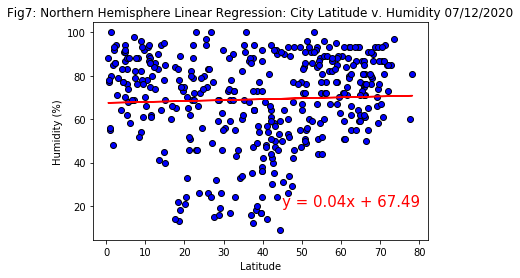

In [21]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Humidity':
x = northern_hemi['Latitude']
y = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(45,20), fontsize=15, color="r")
plt.title(f"Fig7: Northern Hemisphere Linear Regression: City Latitude v. Humidity {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig7.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003601706359869529


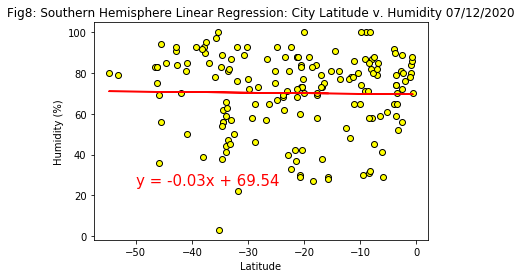

In [22]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Humidity':
x = southern_hemi['Latitude']
y = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,25), fontsize=15, color="r")
plt.title(f"Fig8: Southern Hemisphere Linear Regression: City Latitude v. Humidity {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig8.png')
plt.show()

* Observing the Northern and Southern Hemisphere:
    * The Northern Hemisphere has a very small, slight upward regression.
    * The humidity in both hemispheres show a consistent relationship that the humidity is generally highest amongst the cities near the Equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0004802632520787391


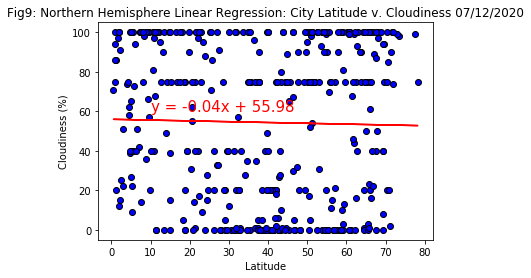

In [23]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Cloudiness':
x = northern_hemi['Latitude']
y = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(10,60), fontsize=15, color="r")
plt.title(f"Fig9: Northern Hemisphere Linear Regression: City Latitude v. Cloudiness {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig9.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016392241459624285


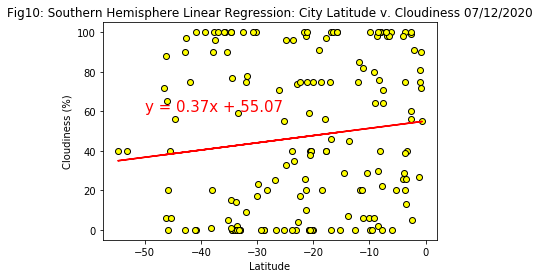

In [24]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Cloudiness':
x = southern_hemi['Latitude']
y = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,60), fontsize=15, color="r")
plt.title(f"Fig10: Southern Hemisphere Linear Regression: City Latitude v. Cloudiness {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig10.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * The Northern Hemisphere the cloudiness is basically evenly dispersed across the entire hemisphere. No one particular region or accumulation of cities occurs but still shows a downward trend as you get closer to the North Pole.
    * Simiarly, the Southern Hemisphere, the scatter points are somewhat dispersed. The Southern Hemisphere shows an upward trend in cloudiness as you get closer to the Equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 2.0404969517164196e-05


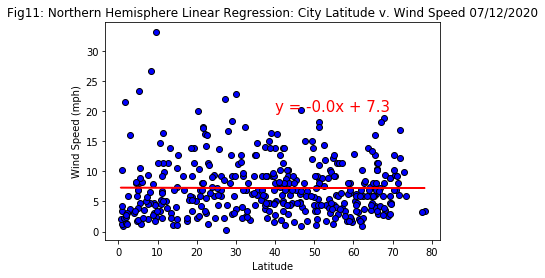

In [25]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Wind Speed':
x = northern_hemi['Latitude']
y = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(40,20), fontsize=15, color="r")
plt.title(f"Fig11: Northern Hemisphere Linear Regression: City Latitude v. Wind Speed {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig11.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.021532124114632085


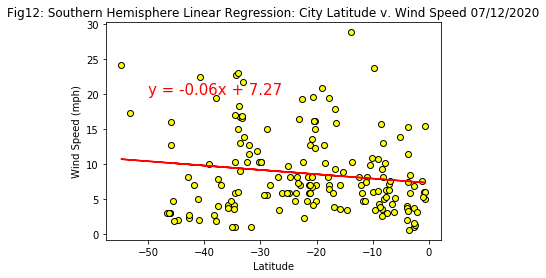

In [26]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Wind Speed':
x = southern_hemi['Latitude']
y = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,20), fontsize=15, color="r")
plt.title(f"Fig12: Southern Hemisphere Linear Regression: City Latitude v. Wind Speed {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig12.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * In this last pair of plots, both the Northern and Southern Hemispheres were very similar. There seems to be only one city in each hemisphere where they are experiencing winds above 30-35 mph.